# Clustering and Classifying Wine Using Machine Learning, R, and GridDB



This article will cover the creation of wine clusters based on a **Wine** dataset's different attributes. **R Programming** will be used, which is very useful in creating a set of groups representing some of the differences and similarities found in the types of wines. In addition, **GridDB** will be our central database for this program as it is ideally suited to hold machine learning datasets. The article will outline the requirements needed to set up our database **GridDB**. Following that, we will briefly describe our dataset and model. To finish off, we will interpret the results and come up with our conclusion.

## Requirements

The **GridDB** database storage system will store our dataset while building our clustering machine learning model. **GridDB** must be downloaded and configured in your operating system to be fully functional.

Make sure to run the following R statements to import the needed libraries useful in running our **Wine** Cluster:

In [ ]:
library(readr)
library(tidyverse)
library(dplyr)
library(magrittr)
library(tidyr)
library(ggplot2)
library(factoextra)
library(GGally)
library(devtools)
library(cluster)
library(pvclust)
library(NbClust)
library(clValid)
library(RJDBC)

## The Dataset

To implement the clustering algorithm, we will use the **wine** dataset to create wine clusters. The dataset is composed of **14** attributes and **178** instances.

In [ ]:
df <- read_csv("data.csv")

The attributes covered in this dataset are as follows:

- **Alcohol** is a numeric value.
- **Malic Acid** is a numeric value.
- **Ash** is a numeric value.
- **Ash Alcanity** is a numeric value.
- **Magnesium** is a numeric value.
- **Total Phenols** is a numeric value.
- **Flavanoids** is a numeric value.
- **Nonflavanoid Phenols** is a numeric value.
- **Proanthocyanins** is a numeric value.
- **Color Intensity** is a numeric value.
- **Hue** is a numeric value.
- **OD280** is a numeric value.
- **Proline** is an integer value.
- **Customer Segment** is an integer value that takes **three** categories of segments **1**, **2**, and **3**.

Find below an extract of the dataset:

In [ ]:
Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
14.23,1.71,2.43,15.6,127,2.8,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
13.2,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.4,1050,1
13.16,2.36,2.67,18.6,101,2.8,3.24,0.3,2.81,5.68,1.03,3.17,1185,1
14.37,1.95,2.5,16.8,113,3.85,3.49,0.24,2.18,7.8,0.86,3.45,1480,1
13.24,2.59,2.87,21,118,2.8,2.69,0.39,1.82,4.32,1.04,2.93,735,1
14.2,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450,1
14.39,1.87,2.45,14.6,96,2.5,2.52,0.3,1.98,5.25,1.02,3.58,1290,1
14.06,2.15,2.61,17.6,121,2.6,2.51,0.31,1.25,5.05,1.06,3.58,1295,1
14.83,1.64,2.17,14,97,2.8,2.98,0.29,1.98,5.2,1.08,2.85,1045,1

We must use the **GridDB** database to store this dataset in our long-term storage. This enables us to test different machine learning algorithms and create a cloud storage solution to hold a predefined version of our dataset. This is very useful in the testing and feature engineering of our data science process.

In the following code, we implement the steps described above:

In [ ]:
drv <- JDBC("com.toshiba.mwcloud.gs.sql.Driver","/usr/share/java/gridstore-jdbc-5.0.0.jar")

conn <- dbConnect(drv, "jdbc:gs://192.168.0.10:20001/mydata/public", "admin", "admin")

# Implementing a K-means Clustering in R

This article will employ a k-means cluster. To explain, this unsupervised machine learning model creates groups of attributes based on similarities in a dataset. To simplify, our model will create wine groups based on acidity, flavor, and other chemical alcohol features. 

To run a K-means model using R programming, we will have first to normalize our data frame using the `scale` method as follows:

In [ ]:
df_normalize <- as.data.frame(scale(df))

# Store Data in GridDB

In this section, we will ensure that the data was correctly stored in our database and that there were no errors. We will use the `SELECT` query to complete this task, which returns all database values.

The following code was used to conduct the task explained in this section:

In [ ]:
for (i in 1:nrow(out)) {
  RJDBC::dbWriteTable(conn, "wine_data", out[i, ], append = TRUE )
}

# Retrieve the Data from GridDB

In this section, we will ensure that the data was correctly stored in our database and that there were no errors. We will use the `SELECT` query to complete this task, which returns all database values.

The following code was used to conduct the task explained in this section:

In [ ]:
queryString <- "select * from wine_data"

rs <- dbGetQuery(conn, queryString)

# Build the K-means Clustering

The K-means Clustering model will output the different wine groups based on their chemical similarities in our R program. Our code will first initialize the K-means Cluster object. The K-means Clustering algorithm will then be set up using the standard parameters.

In [ ]:
km.res <- kmeans(df_norm, 3, nstart = 25)

# Conclusion & Results

The final section of our article is the understanding of our results. To easily digest how well our K-means Cluster successfully outputted the wine groups based on their chemical analysis. The main number we shall focus on in this section is the number of clusters. This represents the total number of wine groups discovered using our K means algorithm. Our K-means Cluster outputted three groups. To explain, this is considered a great result as we can identify the edges of each group and their dimensions from the graph. For future development, our model will fully use the **GridDB** database as it provides an easy input-output data interface and an incredible speed of data retrieval.

The following cluster plot is a representation of our results:

Warning message:
“argument frame is deprecated; please use ellipse instead.”Warning message:
“argument frame.type is deprecated; please use ellipse.type instead.”

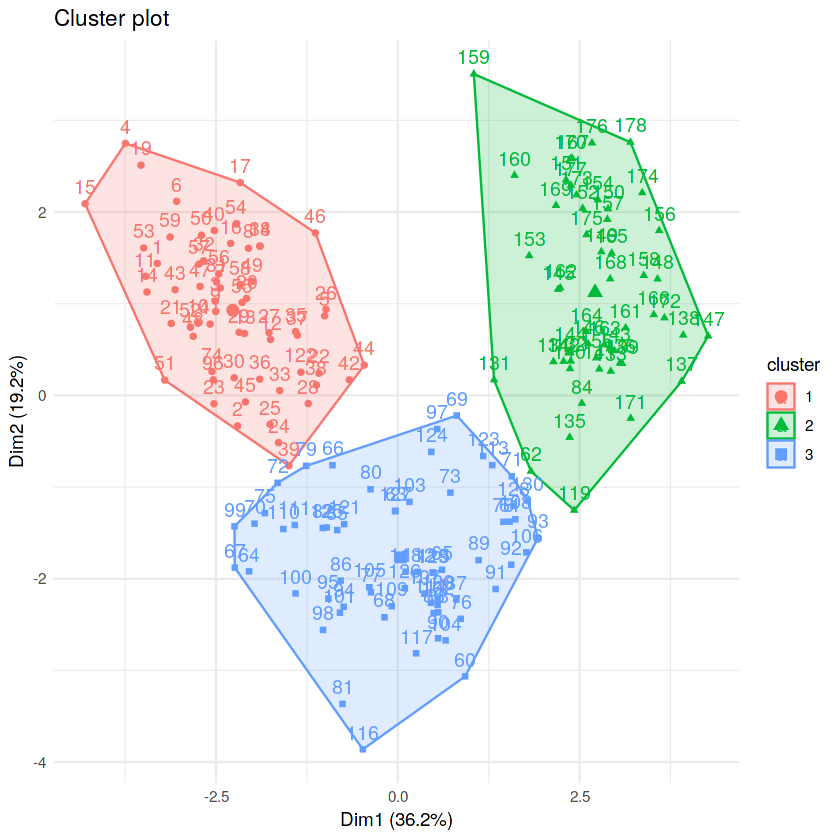

In [ ]:
fviz_cluster(km.res, data = df_norm, frame.type = "convex")